In [1]:
import joblib
import pandas as pd
#import text_processing as text
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('datasets/movie_train.csv',index_col=0)

X_train = train['Plot']
y_train = train['Genre']

In [3]:
X_test = pd.read_csv('datasets/movie_test.csv',index_col=0)['Plot']
y_test = pd.read_csv('datasets/test_actuals.csv',index_col=0,header=None,names=['genre'])['genre']

In [4]:
[data.sort_index(inplace=True) for data in [X_test,X_train,y_test,y_train]]

[None, None, None, None]

In [5]:
from definitions import *

In [6]:
model_1 = joblib.load('saved_models/weighted_f1_62')
model_2 = joblib.load('saved_models/weighted_f1_621')

Using TensorFlow backend.


In [7]:
fit = model_2.fit(X_train,y_train)
pred2 = fit.predict(X_test)

In [13]:
report = pd.DataFrame(classification_report(y_test,pred2,output_dict=True))
report

,action,adventure,comedy,crime,drama,horror,romance,thriller,western,accuracy,macro avg,weighted avg
precision,0.454545,0.500000,0.693548,0.411765,0.680034,0.743902,0.439516,0.432099,0.798030,0.635496,0.572604,0.634611
recall,0.560000,0.529412,0.691318,0.350000,0.646916,0.813333,0.531707,0.295359,0.890110,0.635496,0.589795,0.635496
f1-score,0.501792,0.514286,0.692432,0.378378,0.663062,0.777070,0.481236,0.350877,0.841558,0.635496,0.577855,0.633063
support,250.000000,102.000000,933.000000,120.000000,1232.000000,300.000000,205.000000,237.000000,182.000000,0.635496,3561.000000,3561.000000


In [17]:
classes = list(report.columns)

In [38]:
def plot_confusion_matrix(true,predicted,classes):
    import itertools
    cm=confusion_matrix(true,predicted,labels=classes)
    
    fig = plt.figure(figsize=(13,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm,cmap=plt.cm.Blues)
    #plt.title('Confusion matrix',fontdict={'size':20})
    fig.colorbar(cax)
    ax.set_xticklabels([''] + classes,fontdict={'size':14})
    ax.set_yticklabels([''] + classes,fontdict={'size':14})
    plt.xlabel('Predicted',fontdict={'size':14})
    plt.ylabel('True',fontdict={'size':14})
    plt.grid(b=None)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             fontdict={'size':14,'weight':'heavy'},
             color="black" if cm[i, j] > thresh else "black")
    return fig

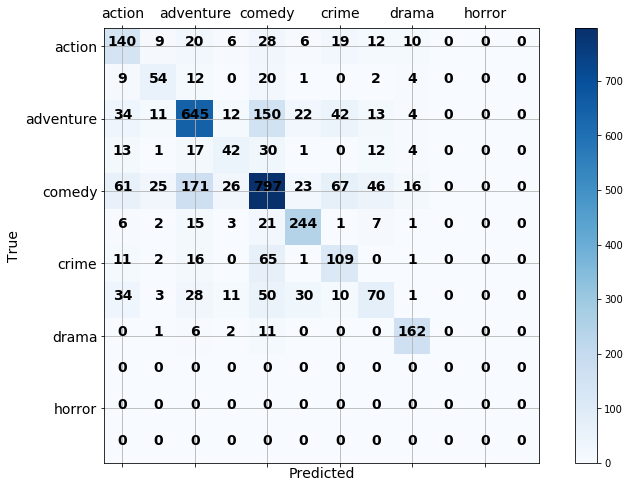

In [40]:
fig = plot_confusion_matrix(y_test,pred2,classes)

In [41]:
fig.savefig('images/cm.png')